# 1. Definição do problema

Tem-se um conjunto de dados de usuários de seguro saúde com os respectivos custos. O objetivo é entender quais variáveis impactam nestes custos e criar um modelo preditivo que, baseado em um conjunto de dados de teste que não contém a informações dos custos, preveja qual valor gasto por cada usuário.

# 2. Preparação dos dados

## 2.1 - Reunir / importar

In [1]:
import pandas as pd
dado = pd.read_csv("seguro.csv")

## 2.2 - Avaliar

In [2]:
dado.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#tamanho da amostra
dado.shape

(1338, 7)

In [4]:
# Há dados NaN?
dado.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Há dados faltantes? Quais os tipos de dados?
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
#Há dados duplicados? Se sim, quantos?
sum(dado.duplicated())

1

## 2.3 - Limpar dados

### Dados faltantes
Não encontrados, logo não é necessário tratar

### Dados duplicados
Foi encontrado apenas um dado duplicado (com todas as colunas iguais), e ele será eliminado

In [7]:
dado.drop_duplicates(inplace=True)

In [8]:
#conferir se ele foi eliminado - antes haviam
dado.shape

(1337, 7)

### Tipos incorretos de dados
Não foi necessário converter os dados nessa fase de preparação. Caso necessário serão alterados dados na etapa de modelagem

In [ ]:
#se fosse necessário converter, por exemplo
# dado['coluna'] = pd.to_datetime(dado['coluna'])

In [ ]:
#Se necessário renomear colunas
# dado.rename(columns={"Aaa-bbb": "Aaa_bbb"}, inplace=True)

# 3. Análise exploratória dos dados

### 3.1 - Quais características disponíveis?

In [9]:
print(dado.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Características:
- *age*: idade
- *sex*: sexo
- *bmi*: índice de massa corporal
- *children*: quantidade de filhos
- *region*: rigião do país em que mora
- *charges*: custo do usuário com seguro saúde

### 3.2 Quais features são categóricas?

- *Nominal*: sex, smoker, region
- *Ordinal*: children

### 3.3 Quais features são numéricas?

- *Contínuo*: bmi, charges
- *Discreto*: age 

OBS: Não há alfanuméricos

### 3.4 Qual é a distribuição das características numéricas?

In [10]:
dado.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### 3.5 Qual a distribuição das características categóricas?

In [11]:
dado.describe(include=['O'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


### 3.6 Análise para decisão de características

In [12]:
import pandas as pd
%matplotlib inline

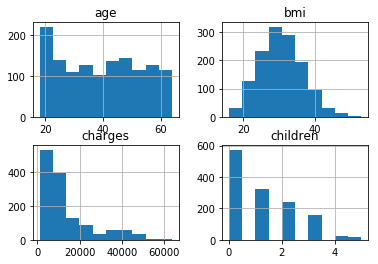

In [13]:
dado.hist();

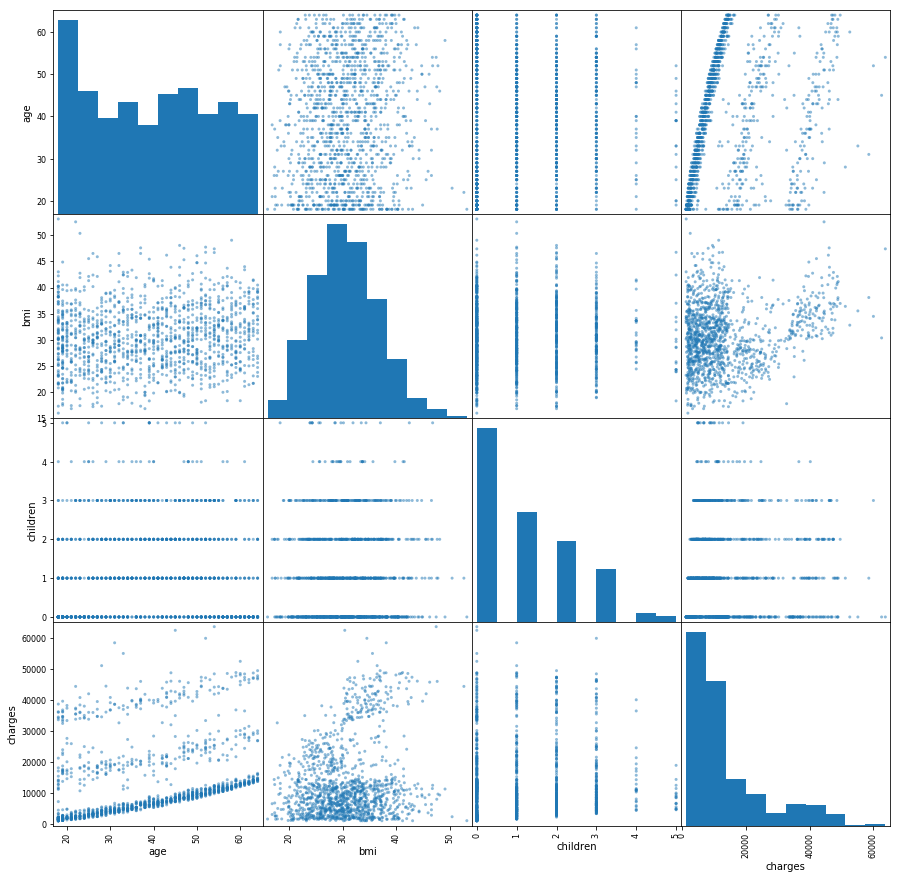

In [14]:
pd.plotting.scatter_matrix(dado, figsize=(15, 15));

#### A) Children

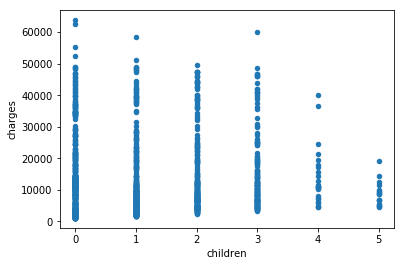

In [15]:
dado.plot(x='children', y='charges', kind='scatter');

In [16]:
dado[['children', 'charges']].groupby(['children'], as_index=False).mean().sort_values(by='charges', ascending=False)

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12384.695344
5,5,8786.035247


Não encontramos correlação suficiente para usar essa característica no modelo

#### B) Sex

In [17]:
#tranformar em dado numérico para plotagem
dado['sex'] = dado['sex'].map( {'female': 0, 'male': 1} ).astype(int)

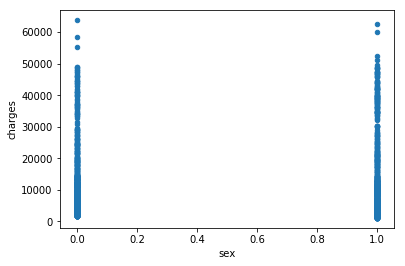

In [18]:
dado.plot(x='sex', y='charges', kind='scatter');

In [19]:
dado[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

,sex,charges
1,1,13974.998864
0,0,12569.578844


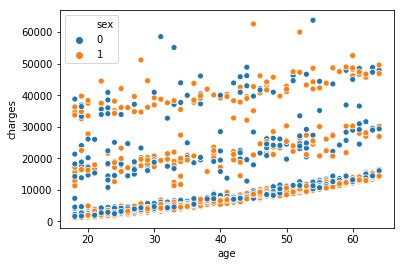

In [20]:
#Tentar correlação com mais um dado, de idade, para tentar identificar se o sexo faz diferença no custo
import seaborn as sbn
sbn.scatterplot(x = "age", y = "charges", hue = "sex", data = dado)

Não encontramos correlação suficiente para usar essa característica no modelo

### C) Region

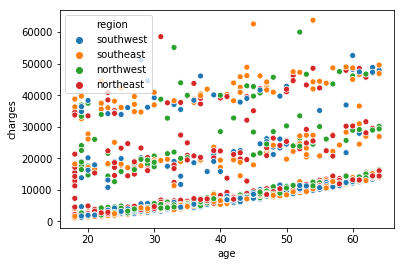

In [21]:
sbn.scatterplot(x = "age", y = "charges", hue = "region", data = dado)

Não encontramos correlação suficiente para usar essa característica no modelo

### D) Age

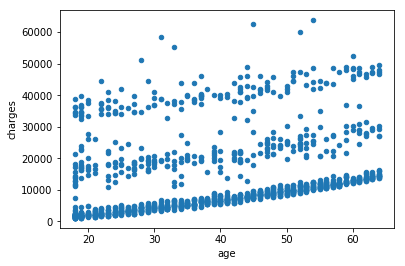

In [22]:
dado.plot(x='age', y='charges', kind='scatter');

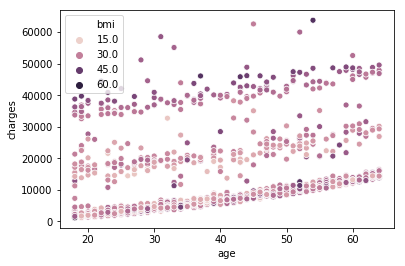

In [23]:
#Verificar se é possível melhorar a correlação acrescentando o BMI a idade
sbn.scatterplot(x = "age", y = "charges", hue = "bmi", data = dado)

**Há correlação** entre idade do usuário e o custo do seguro saúde, e o modelo é ainda melhor se usado em conjunto com outras variáveis, como bmi.

### E) BMI

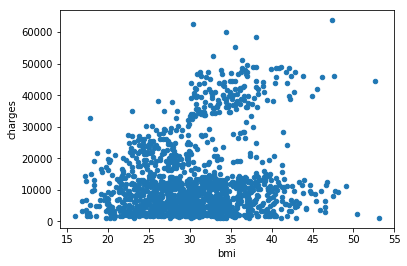

In [24]:
dado.plot(x='bmi', y='charges', kind='scatter');

A plotagem ficou muito poluída. Decidimos tranformar a variável em categórica, com 4 níveis, para ajudar a visualizar uma possível correlação com o custo do seguro saúde.

In [25]:
#criar variável temporária com describe
temp = dado.describe()
temp

,age,sex,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,13279.121487
std,14.044333,0.500163,6.100468,1.205571,12110.359656
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [26]:
#montar uma lista com os valores encontrados
borda = [temp.loc["min"].bmi, temp.loc["25%"].bmi, temp.loc['50%'].bmi, temp.loc['75%'].bmi, temp.loc['max'].bmi]
# exemplo de verificação da borda - temp.loc["min"].bmi

#dar rótulos aos níveis numa lista
names = ["Baixo" ,"Médio" ,"Moderadamente alto" ,"Alto"]

#criar nova coluna com os níveis de acidez (acidity levels)
dado['bmi_categorias'] = pd.cut(dado['bmi'], borda, labels=names)
dado.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categorias
0,19,0,27.900,0,yes,southwest,16884.92400,Médio
1,18,1,33.770,1,no,southeast,1725.55230,Moderadamente alto
2,28,1,33.000,3,no,southeast,4449.46200,Moderadamente alto
3,33,1,22.705,0,no,northwest,21984.47061,Baixo
4,32,1,28.880,0,no,northwest,3866.85520,Médio


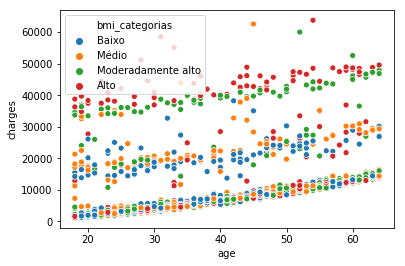

In [27]:
sbn.scatterplot(x = "age", y = "charges", hue = "bmi_categorias", data = dado)

Quando o BMI é moderadamente alto ou alto (pessoas obesas), os custos do seguro saúde tendem a ser muito maiores.

Vamos criar uma nova coluna (BMI_GASTO), separando BMI_COMUM (dados de bmi baixo e médio) e BMI_OBESO (dados de bmi alto e moderadamente alto), para analisar se entre os comuns também há alguma variável que os separe melhor

In [30]:
#inicialmente digo que todos são BMI_COMUM
dado["BMI_GASTO"] = "BMI_COMUM"

#depois crio BMI_OBESO com dados alto e moderadamente alto
dado.loc[dado.bmi_categorias.isin(["Alto", "Moderadamente alto"]),"BMI_GASTO"] = "BMI_OBESO"
dado.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categorias,BMI_GASTO
0,19,0,27.900,0,yes,southwest,16884.92400,Médio,BMI_COMUM
1,18,1,33.770,1,no,southeast,1725.55230,Moderadamente alto,BMI_OBESO
2,28,1,33.000,3,no,southeast,4449.46200,Moderadamente alto,BMI_OBESO
3,33,1,22.705,0,no,northwest,21984.47061,Baixo,BMI_COMUM
4,32,1,28.880,0,no,northwest,3866.85520,Médio,BMI_COMUM


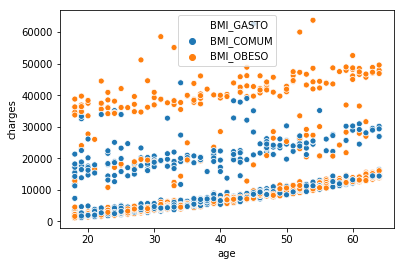

In [31]:
#confirmação de que os obesos gastam mais no seguro saúde
sbn.scatterplot(x = "age", y = "charges", hue = "BMI_GASTO", data = dado)

In [37]:
dado[['BMI_GASTO', 'charges']].groupby(['BMI_GASTO'], as_index=False).mean().sort_values(by='charges', ascending=False)

,BMI_GASTO,charges
1,BMI_OBESO,15704.090881
0,BMI_COMUM,10886.581103


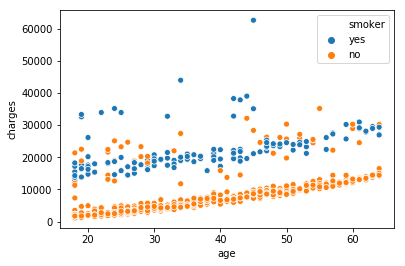

In [33]:
#separar dados de BMI_COMUM
dado_bmicomum = dado.loc[dado.BMI_GASTO == "BMI_COMUM"]

#analisar correlação com fumantes
sbn.scatterplot(x = "age", y = "charges", hue = "smoker", data = dado_bmicomum)

Dentre as pessoas não obesas, os fumantes tem maiores custos com seguro saúde

### F) Smoker

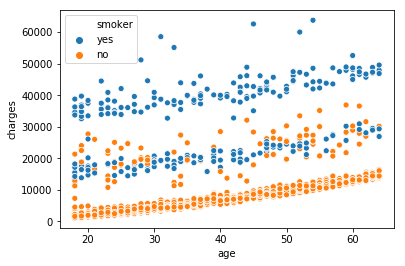

In [34]:
#confirmar se fumar influencia todos os usuários
sbn.scatterplot(x = "age", y = "charges", hue = "smoker", data = dado)

In [36]:
dado[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

,smoker,charges
1,yes,32050.231832
0,no,8440.660307


**Há correlação** entre ser fumante e o custo do seguro saúde, e o modelo é ainda melhor se usado em conjunto com outras variáveis, como bmi

# 4. Conclusões

Iremos criar um modelo de regressão logística

## 4.1 Organizar e limpar dados

In [38]:
dado.head()

,age,sex,bmi,children,smoker,region,charges,bmi_categorias,BMI_GASTO
0,19,0,27.900,0,yes,southwest,16884.92400,Médio,BMI_COMUM
1,18,1,33.770,1,no,southeast,1725.55230,Moderadamente alto,BMI_OBESO
2,28,1,33.000,3,no,southeast,4449.46200,Moderadamente alto,BMI_OBESO
3,33,1,22.705,0,no,northwest,21984.47061,Baixo,BMI_COMUM
4,32,1,28.880,0,no,northwest,3866.85520,Médio,BMI_COMUM


Iremos usar as seguintes variáveis:
- **age**
- **bmi**
- **smoker**
- **charges**

In [39]:
#excluir as variáveis não necessárias
dado_limpo = dado.drop(['sex', 'region', 'children', 'bmi_categorias', 'BMI_GASTO'], axis=1)
dado_limpo.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


Tranformar a variável smoker em numérica para ser possível usar regressão logísitica

In [40]:
dado_limpo['smoker'] = dado_limpo['smoker'].map( {'no': 0, 'yes': 1} ).astype(int)
dado_limpo.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## 4.2 Criar modelo preditivo

In [42]:
x_values = dado_limpo.drop('charges',axis=1)

In [41]:
y_values = dado_limpo['charges']

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_values, y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Testar**

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30, random_state=42)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = model.predict(X_test)

**Verificar acurácia**

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

39328093.802544706

In [47]:
mean_absolute_error(y_test, y_pred)

4216.004137504099

In [48]:
r2_score(y_test, y_pred)

0.7701693516563222

**Plotar o real e o predito**

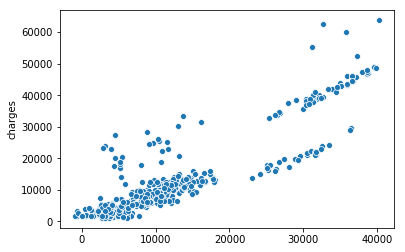

In [49]:
sbn.scatterplot(x=y_pred, y=y_test)

# OBSERVAÇÕES ADICIONAIS

Se preferir ao invés de fazer um modelo, usar modelos diferentes para as variáveis escolhidas, podemos fazer. Depois iremos fazer modelos preditivos em cima de cada um deles. Por exemplo:

In [ ]:
dado_smoker_no = dado[dado['smoker']=='no']
dado_smoker_no.head()

In [ ]:
dado_smoker_yes = dado[dado['smoker']=='yes']
dado_smoker_yes.head()

Se preferir transformar os dados selecionados em categóricos, podemos. Assim é possível usar outros modelos preditivos. Por exemplo:

In [ ]:
#DESSA FORMA NÃO CONSEGUI PEGAR O NÚMERO 18... DEU ERRO
#montar uma lista com os valores encontrados
#borda_age = [temp.loc["min"].age, temp.loc["25%"].age, temp.loc['50%'].age, temp.loc['75%'].age, temp.loc['max'].age]

#dar rótulos aos níveis numa lista
#names_age = ["18-27" ,"27-39" ,"39-51" ,"51-64"]

#criar nova coluna com os níveis de acidez (acidity levels)
#dado['age_novo'] = pd.cut(dado['age'], borda_age, labels=names_age)
#dado.head()

In [ ]:
#incluusive a partir daí plotar
#dado[['age_novo', 'charges']].groupby(['age_novo'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [ ]:
#dado[['age_novo', 'charges', 'smoker']].groupby(['age_novo', 'smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [ ]:
dado['nova_coluna'] = 0
dado.loc[(dado["age"] >=18) & (dado["age"] < 27), "nova_coluna"] = "18-27"
dado.loc[(dado["age"] >=27) & (dado["age"] < 39), "nova_coluna"] = "27-39"
dado.loc[(dado["age"] >=39) & (dado["age"] < 51), "nova_coluna"] = "39-51"
dado.loc[(dado["age"] >=51) & (dado["age"] < 64), "nova_coluna"] = "51-64"